## Human Cognitive Score Prediction

## Overview

In this analysis, a dataset containing 80,000 samples is explored with the objective of predicting human cognitive scores based on a variety of lifestyle, demographic, and behavioral features. The dataset includes attributes such as age, sleep duration, stress level, diet type, screen time, exercise frequency, caffeine intake, and more—each potentially influencing cognitive performance. This dataset is sourced from [Kaggle](https://www.kaggle.com/datasets/samxsam/human-cognitive-performance-analysis/data).

The goal is to uncover meaningful patterns and relationships within the data, perform relevant preprocessing and feature engineering, and build a robust predictive model to estimate an individual’s cognitive score based on their behavioral actions. Throughout the analysis, trends are visualized, categorical and numerical features are handled appropriately, and the impact of various factors on human cognition is evaluated to develop an effective model for predicting cognitive performance.

### Importing The Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error,root_mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
import shap



### Reading the Data

In [8]:
data = pd.read_csv('human_cognitive_performance.csv')

In [10]:
data.shape

(80000, 13)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


In [14]:
data.head()

User_ID  Age  Gender  Sleep_Duration  Stress_Level       Diet_Type  \
0      U1   57  Female             6.5             3  Non-Vegetarian   
1      U2   39  Female             7.6             9  Non-Vegetarian   
2      U3   26    Male             8.2             6      Vegetarian   
3      U4   32    Male             7.8             9      Vegetarian   
4      U5   50    Male             9.7             2  Non-Vegetarian   

   Daily_Screen_Time Exercise_Frequency  Caffeine_Intake  Reaction_Time  \
0                6.5             Medium               41         583.33   
1               10.8               High              214         368.24   
2                5.7                Low              429         445.21   
3                8.3                Low              464         286.33   
4               11.3             Medium              365         237.65   

   Memory_Test_Score  Cognitive_Score  AI_Predicted_Score  
0                 65            36.71               39.77  
1                 58            54.35               57.68  
2                 49            32.57               29.54  
3                 94            70.15               74.59  
4                 62            87.54               91.78

### Data Description 

1. **User_ID** – Unique Identifier for Users  
2. **Age** – Age of the User  
3. **Gender** – Gender of the User  
4. **Sleep_Duration** – Sleep hours per night  
5. **Stress_Level** – Stress Level on a scale of 1–10 (1 - No Stress & 10 - Extreme Stress)  
6. **Diet_Type** – Vegetarian, Non-Vegetarian, Vegan  
7. **Daily_Screen_Time** – Hours spent on screens like mobile, laptop, tab etc.  
8. **Exercise_Frequency** – Low, Medium, High  
9. **Caffeine_Intake** – Caffeine consumed per day in milligrams (mg)  
10. **Reaction_Time** – Reaction Time in milliseconds (ms)  
11. **Memory_Test_Score** – Score out of 100 for a conducted memory test  
12. **Cognitive_Score** – Score computed based on the above features  


### Understanding the Data Distribution

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep_Duration'}>,
        <Axes: title={'center': 'Stress_Level'}>],
       [<Axes: title={'center': 'Daily_Screen_Time'}>,
        <Axes: title={'center': 'Caffeine_Intake'}>,
        <Axes: title={'center': 'Reaction_Time'}>],
       [<Axes: title={'center': 'Memory_Test_Score'}>,
        <Axes: title={'center': 'Cognitive_Score'}>,
        <Axes: title={'center': 'AI_Predicted_Score'}>]], dtype=object)

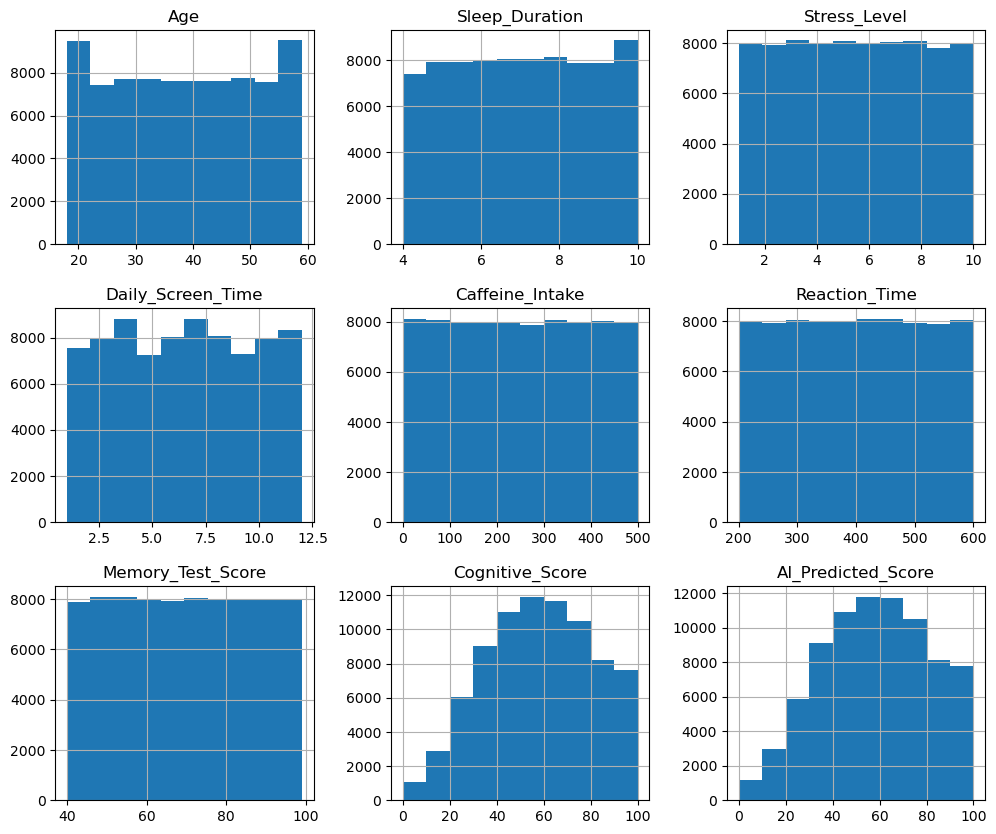

In [19]:
data.hist(figsize=(12, 10))

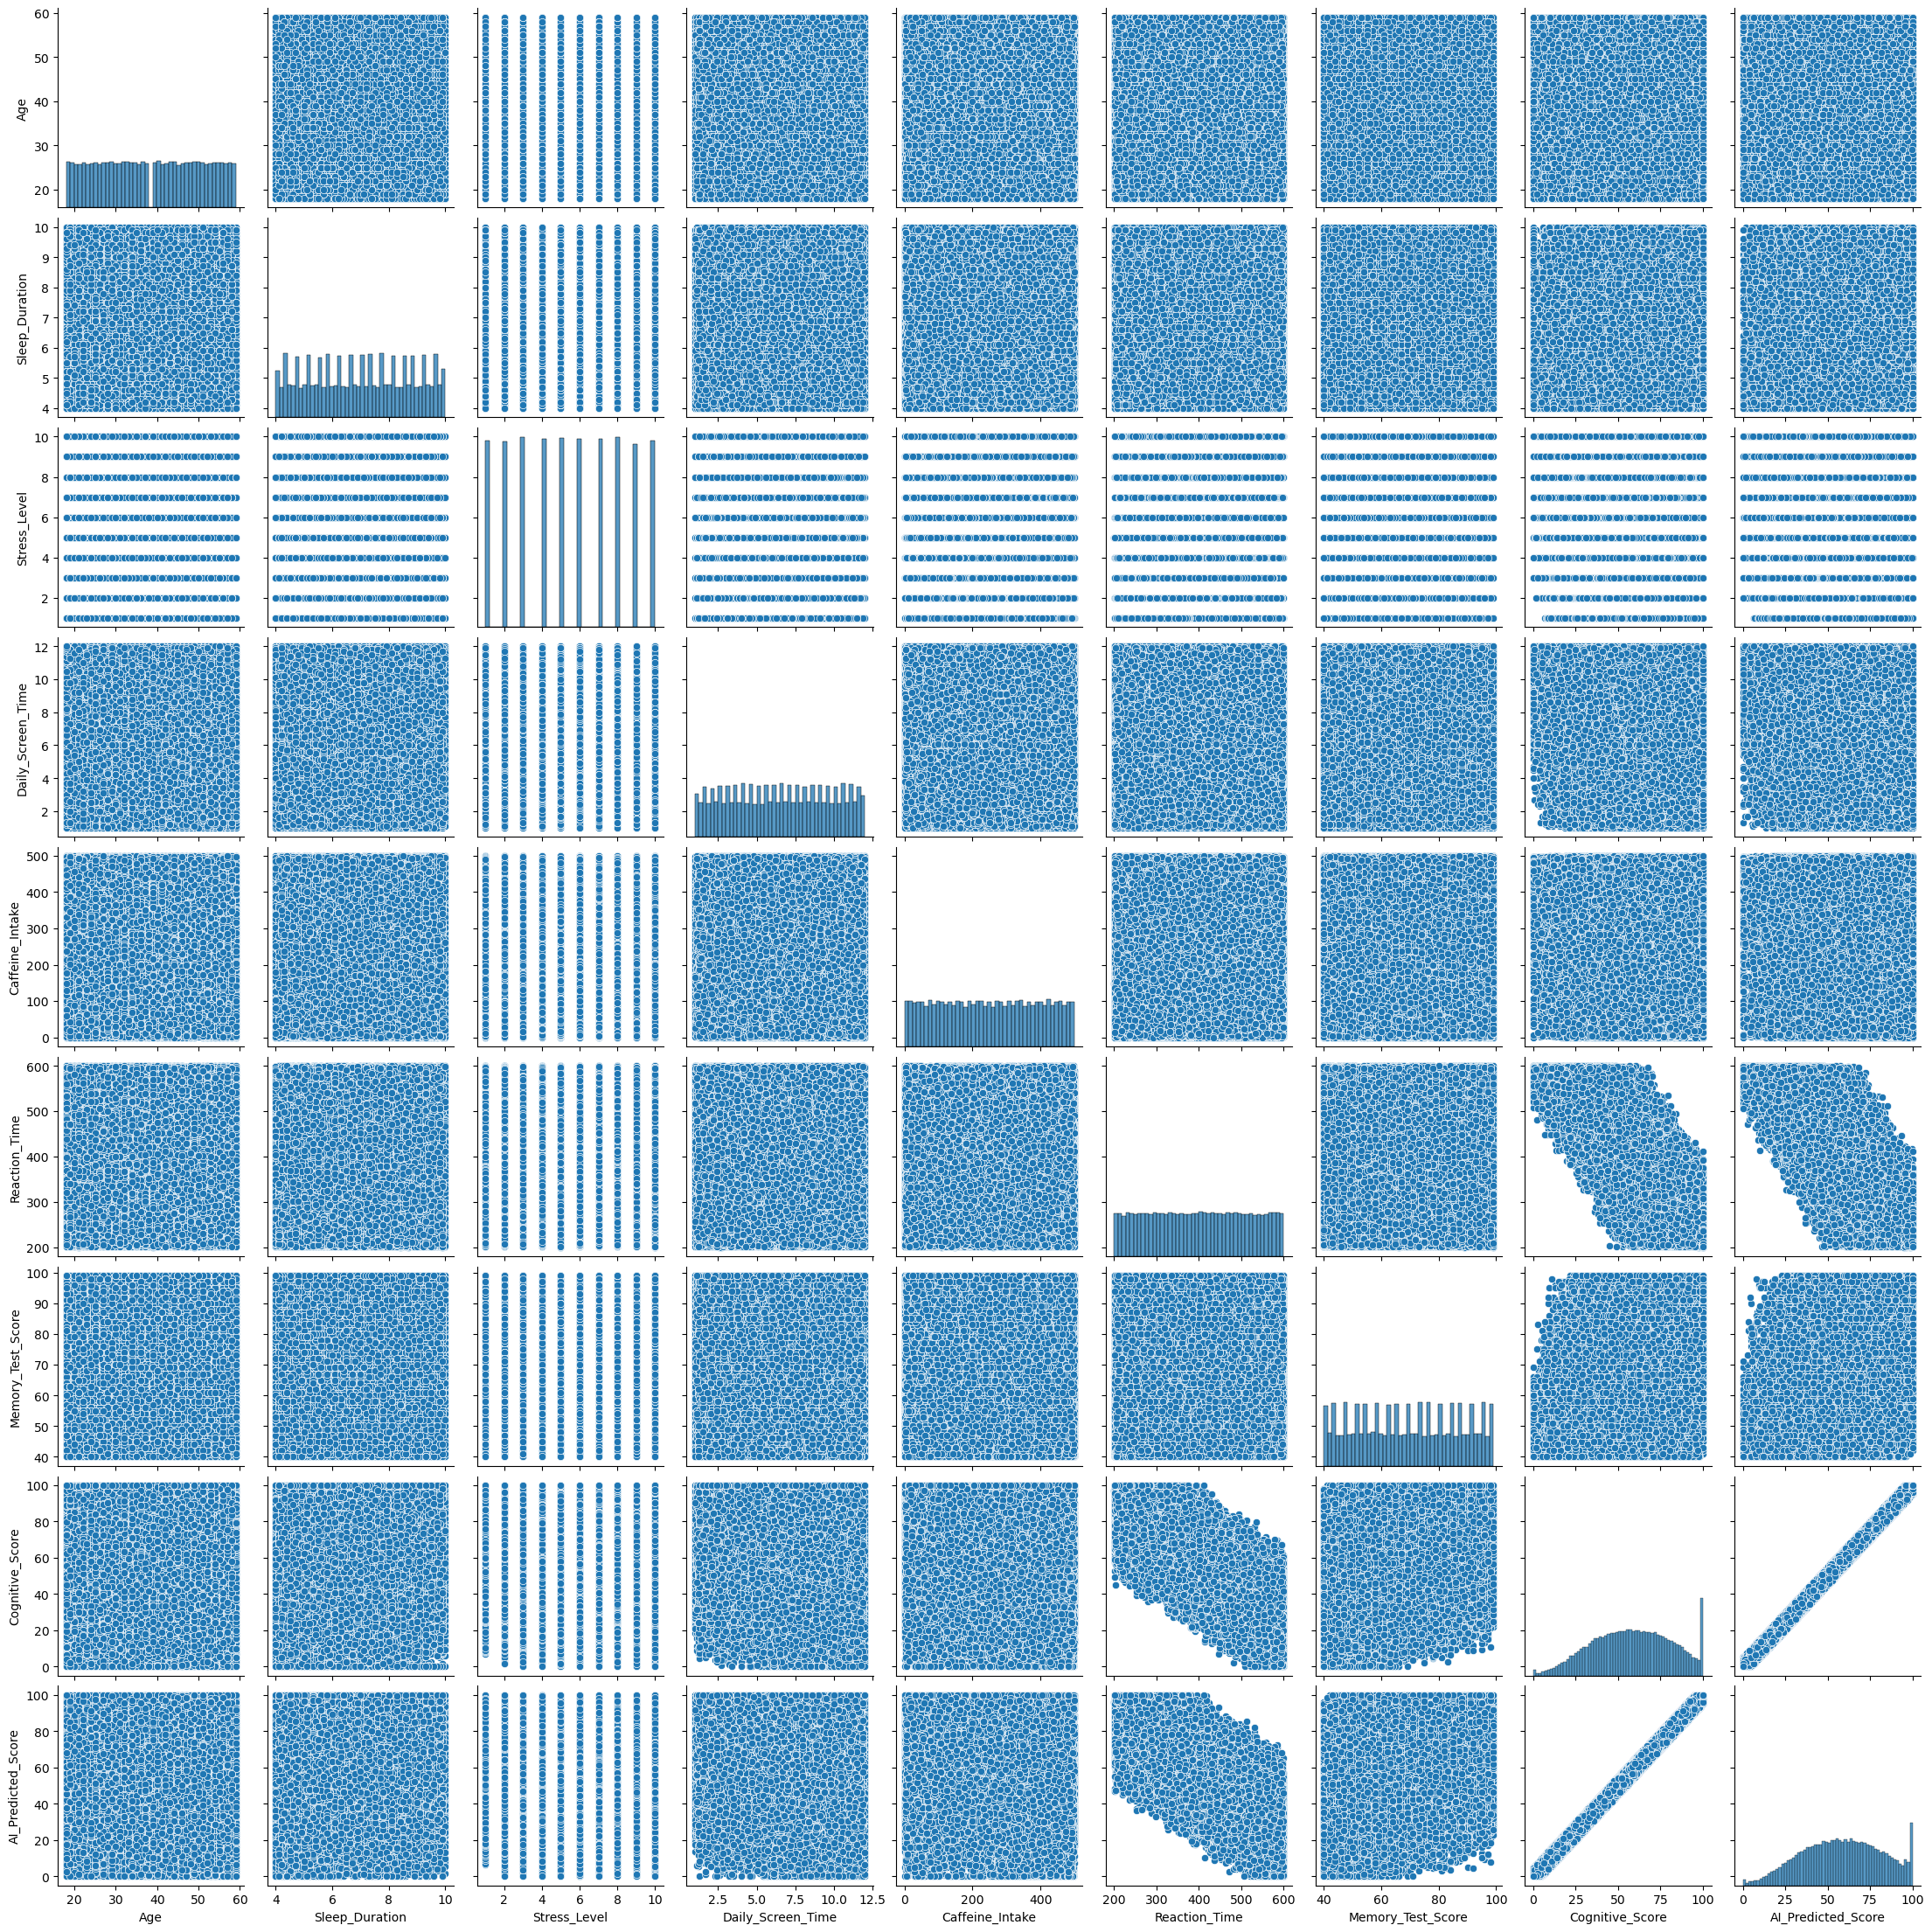

In [20]:
sns.pairplot(data =data)

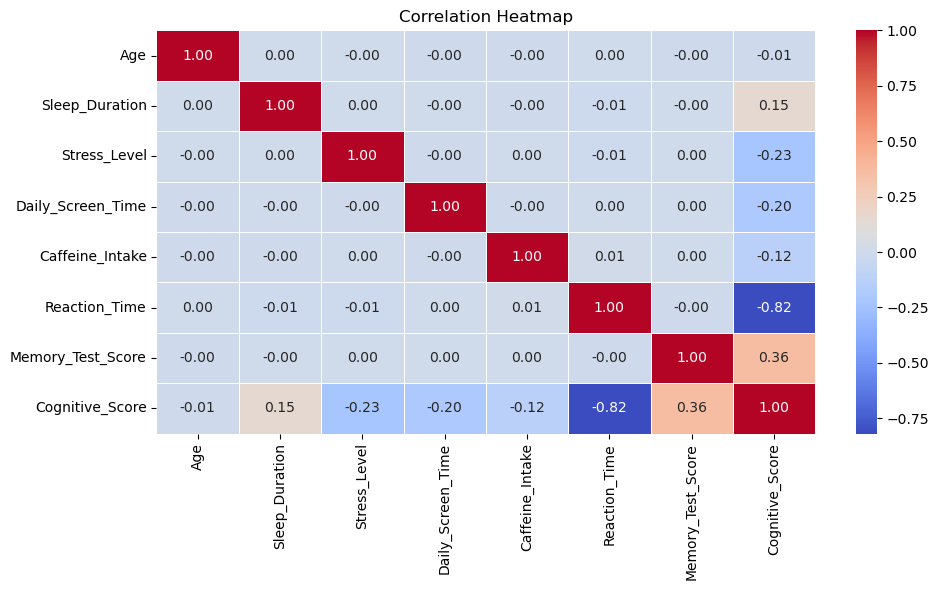

In [22]:
data.drop(columns=['AI_Predicted_Score'], inplace=True, axis= 1)
corr_matrix = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### Feature Engineering - Feature Creation 

Creating two features Age_Group & Sleep_Category for better visualization.
1. **Age_Group** - Groups **Age** column value into 5 bins (**'<20', '20-29', '30-39', '40-49', '50-60'**)
2. **Sleep_Category** - Catagorizes sleep as **'Very Short', 'Short', 'Recommended', 'Long'**, based on the **Sleep_Duration** column value


In [27]:
bins = [0, 20, 30, 40, 50, 60]
labels = ['<20', '20-29', '30-39', '40-49', '50-60']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

bins = [0, 5, 7, 8, 24]
labels = ['Very Short', 'Short', 'Recommended', 'Long']
data['Sleep_Category'] = pd.cut(data['Sleep_Duration'], bins=bins, labels=labels, right=False)

### Data Visualization

Text(0.5, 1.0, 'Cognitive Score Across Age Groups by Sleep Category')

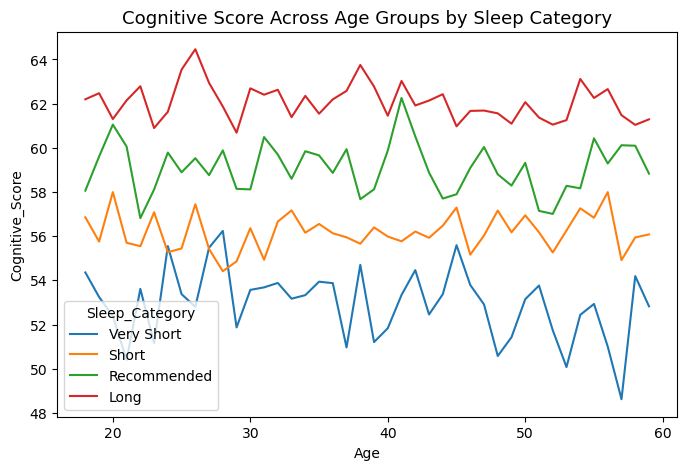

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data = data, x = 'Age', y= 'Cognitive_Score', hue='Sleep_Category', errorbar= None)
ax.set_title('Cognitive Score Across Age Groups by Sleep Category', fontsize=13)

> - Line plot of Age vs. Cognitive_Score with Sleep_Category as a hue indicates that Age alone doesn't have a strong direct impact on Cognitive_Score.
> - Sleep_Category appears to influence the score range—individuals with longer sleep durations tend to exhibit higher Cognitive_Scores.


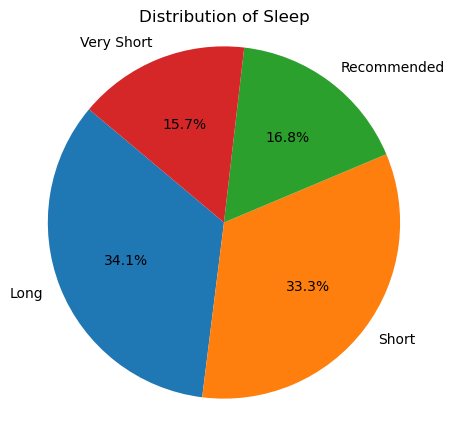

In [33]:
Sleep_Category_Count = data['Sleep_Category'].value_counts()
# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(Sleep_Category_Count, labels=Sleep_Category_Count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sleep', fontsize=12)
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

> Analyzing the distribution of **Sleep_Category** reveals that only around **17%** of the sample population gets the recommended amount of sleep.


Text(0.5, 1.0, 'Distribution of Sleep Categories Based on Diet')

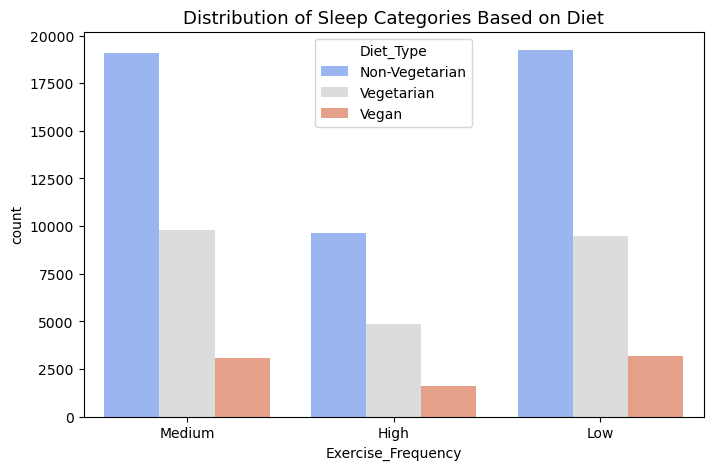

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x=  data['Exercise_Frequency'], hue = data['Diet_Type'], palette='coolwarm')
ax.set_title('Distribution of Sleep Categories Based on Diet', fontsize=13)

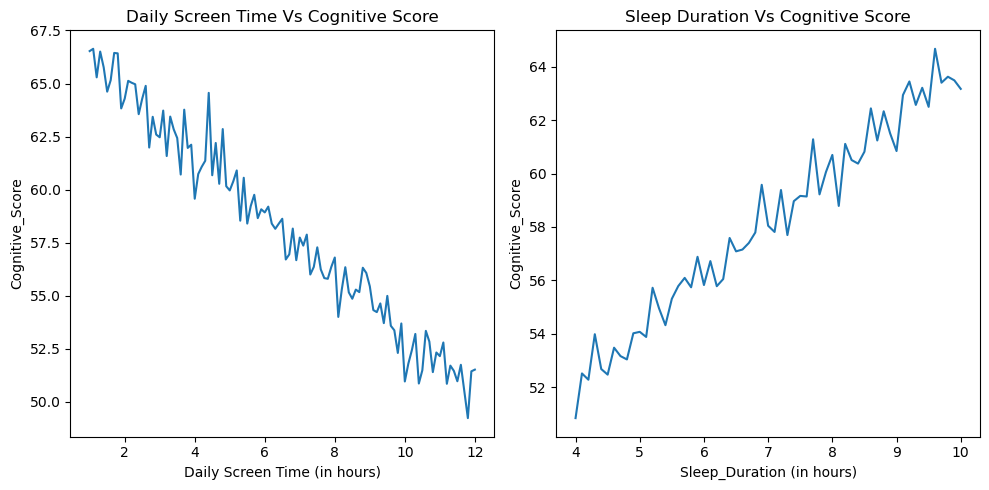

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Example plots
sns.lineplot(data = data, x='Daily_Screen_Time',y='Cognitive_Score', ax=axes[0], errorbar=None)
axes[0].set_title('Daily Screen Time Vs Cognitive Score', fontsize=12)
axes[0].set_xlabel('Daily Screen Time (in hours)')


sns.lineplot(data = data, x='Sleep_Duration',y='Cognitive_Score',ax=axes[1],  errorbar=None )
axes[1].set_title('Sleep Duration Vs Cognitive Score', fontsize=12)
axes[1].set_xlabel('Sleep_Duration (in hours)')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

> The line plot indicates a **negative correlation between Screen Time and Cognitive Score**, 
suggesting that increased screen time is associated with lower cognitive performance.

> The line plot suggests a **positive correlation between Sleep Duration** and **Cognitive Score**, indicating that longer sleep duration tends to correlate with higher cognitive performance.

Text(0.5, 0, 'Caffeine Intake (in milligrams)')

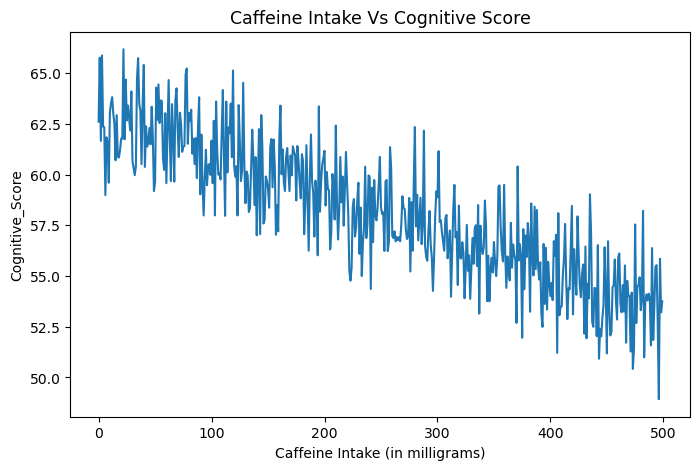

In [41]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data = data, x='Caffeine_Intake',y='Cognitive_Score', errorbar=None)
ax.set_title('Caffeine Intake Vs Cognitive Score', fontsize=12.5)
ax.set_xlabel('Caffeine Intake (in milligrams)')

> Contrary to the common belief that caffeine boosts alertness, the plot reveals a slight **negative correlation 
 between caffeine intake and cognitive score**, suggesting that higher caffeine consumption may be associated with lower cognitive performance in this dataset.


Text(0.5, 1.0, 'Impact of Stress Level on Cognitive Score Across Exercise Frequencies')

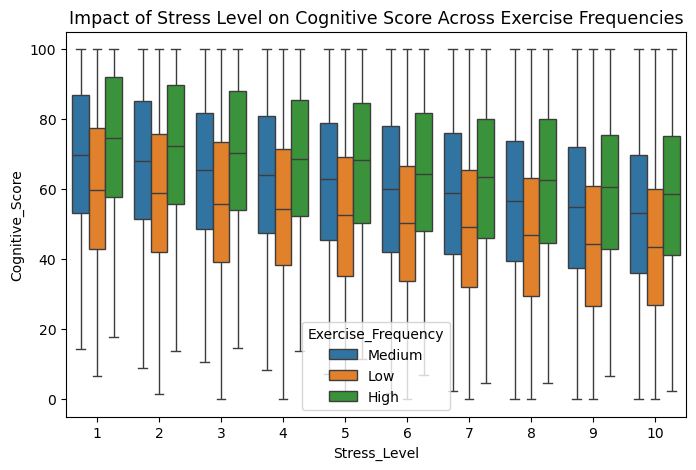

In [44]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=data, x='Stress_Level', y='Cognitive_Score', hue='Exercise_Frequency')
ax.set_title('Impact of Stress Level on Cognitive Score Across Exercise Frequencies', fontsize=12.5)


> The box plot shows a negative correlation between **Stress Level** and **Cognitive Score**, with **Exercise Frequency** enhancing cognitive performance. 
> Exercise Mitigates the Impact of Stress on Cognitive Performance

Text(0.5, 1.0, 'Impact of Memory Test Score on Cognitive Score')

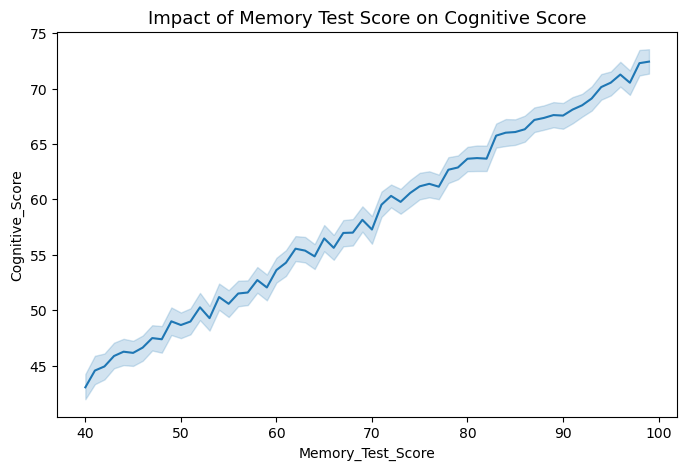

In [46]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data = data, x='Memory_Test_Score',y='Cognitive_Score'  )
ax.set_title('Impact of Memory Test Score on Cognitive Score', fontsize=13)

> Memory Test Score has a positive relation to Cognitive Score.

Text(0, 0.5, 'Reaction Time (in milliseconds)')

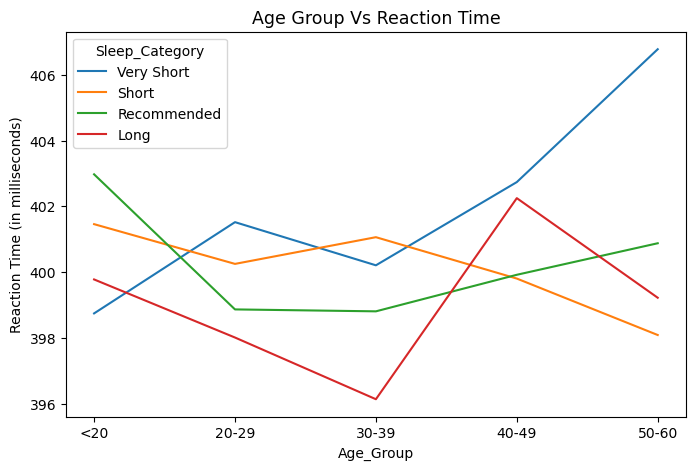

In [49]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data = data, x='Age_Group',y= 'Reaction_Time',hue = 'Sleep_Category',errorbar=None)
ax.set_title('Age Group Vs Reaction Time', fontsize=12.5)
ax.set_ylabel('Reaction Time (in milliseconds)')

> The plot shows a dip in **Reaction Time** across all sleep categories in the 30–40 age group, followed by a gradual increase up to age 50, and a decline in older age. 
> Notably, **Short Sleepers** exhibit an unusual spike in reaction time, indicating potential cognitive sluggishness.


Text(0.5, 0, 'Reaction Time (in milliseconds)')

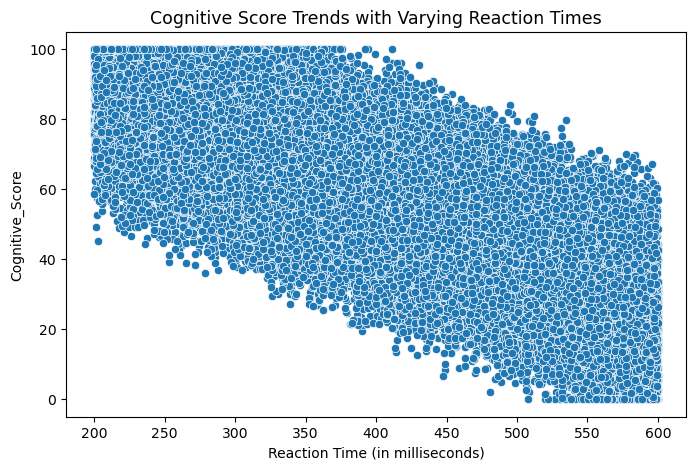

In [51]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(data= data, x='Reaction_Time', y='Cognitive_Score')
ax.set_title('Cognitive Score Trends with Varying Reaction Times', fontsize=12.5)
ax.set_xlabel('Reaction Time (in milliseconds)')

> Scatter plot between Reaction time and cognitive score shows, there is a negative corelation. People who take more time to react turn out to be wih less cognitive score.

### Feature Engineering - Feature Selection

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   User_ID             80000 non-null  object  
 1   Age                 80000 non-null  int64   
 2   Gender              80000 non-null  object  
 3   Sleep_Duration      80000 non-null  float64 
 4   Stress_Level        80000 non-null  int64   
 5   Diet_Type           80000 non-null  object  
 6   Daily_Screen_Time   80000 non-null  float64 
 7   Exercise_Frequency  80000 non-null  object  
 8   Caffeine_Intake     80000 non-null  int64   
 9   Reaction_Time       80000 non-null  float64 
 10  Memory_Test_Score   80000 non-null  int64   
 11  Cognitive_Score     80000 non-null  float64 
 12  Age_Group           80000 non-null  category
 13  Sleep_Category      80000 non-null  category
dtypes: category(2), float64(4), int64(4), object(4)
memory usage: 7.5+ MB


In [57]:
data.drop(columns=['Age_Group','Sleep_Category'], inplace=True, axis= 1)
data.drop(columns=['User_ID'], inplace=True, axis= 1)

In [59]:
data.shape

(80000, 11)

We are retaining the original features and dropping the newly created columns, before splotting them into train and test set. Additionally, we are removing User_ID and AI_Prediction_Score as they do not contribute to our goal of predicting the Cognitive_Score.

### Train-Test Data Split

In [65]:
X = data.drop(columns = ['Cognitive_Score'])
y = data['Cognitive_Score']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Engineering - Feature Transformation

### Feature Scaling & Encoding
- **Normalization** was applied to the numerical features — **Age**, **Caffeine_Intake**, **Sleep_Duration**, **Daily_Screen_Time**, **Reaction_Time**, and **Memory_Test_Score** — as they exhibit a nearly uniform (non-Gaussian) distribution.

- **Ordinal Encoding** was performed on the features **Stress_Level** and **Exercise_Frequency**, as they have an inherent order.

- **Nominal Encoding** was applied to the categorical features **Gender** and **Diet_Type**, since they are non-ordinal categories.


In [72]:
#Ordinal Encoding Ordering
Stress_Level_Order = [[1,2,3,4,5,6,7,8,9,10]]
Exercise_Frequency_Order = [['Low', 'Medium', 'High']]

#Ordered Columns - Ordinal Encoding
ord1_col = ['Stress_Level'] 
ord2_col = ['Exercise_Frequency']

#Nominal Columns - One hot encoding
nom_cols = ['Gender', 'Diet_Type']

#numerical Columns - Almost Uniformly Distributed, so normalizing
num_cols = ['Age', 'Caffeine_Intake','Sleep_Duration', 'Daily_Screen_Time', 'Reaction_Time','Memory_Test_Score' ] 

In [74]:
preprocessor = ColumnTransformer(transformers=[
    ('ord1', OrdinalEncoder(categories = Stress_Level_Order), ord1_col),  
    ('ord2', OrdinalEncoder(categories = Exercise_Frequency_Order), ord2_col),
    ('number', MinMaxScaler(), num_cols), 
    ('nominal', OneHotEncoder(drop='first'), nom_cols) 
])


### Model Building

In [77]:
results = []

### Linear Regression Model

In [80]:
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ord1',
                                                  OrdinalEncoder(categories=[[1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9,
                                                                              10]]),
                                                  ['Stress_Level']),
                                                 ('ord2',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High']]),
                                                  ['Exercise_Frequency']),
                                                 ('number', MinMaxScaler(),
                                                  ['Age', 'Caffeine_Intake',
                                                   'Sleep_Duration',
                                                   'Daily_Screen_Time',
                                                   'Reaction_Time',
                                                   'Memory_Test_Score']),
                                                 ('nominal',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Diet_Type'])])),
                ('model', LinearRegression())])

In [82]:
y_pred_test = pipeline_lr.predict(X_test)
y_pred_train = pipeline_lr.predict(X_train)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score Test: {r2_test:.3f}")
print(f"R² Score Train: {r2_train:.3f}")

MSE: 3.764
RMSE: 1.940
R² Score Test: 0.993
R² Score Train: 0.993


In [84]:
results.append({
    'Model': 'Linear Regression',
    'MSE': round(mse, 4),
    'RMSE': round(rmse, 4),
    'R² Score Test': round(r2_test, 4),
    'R² Score Train': round(r2_train, 4)
})

> The R² score for both the training and test datasets is approximately 0.993, meaning the model explains 99.3% of the variance in the target variable. The small difference in performance between the training and test sets indicates that the model is not overfitting and is able to generalize effectively to unseen data.
> Since this is a **simple linear regression model**, which has limited capacity compared to more complex models, we will enhance it by incorporating **regularization and transitioning to a Lasso Regression model**.

### Lasso Regression Model

In [88]:
from sklearn.linear_model import Lasso
pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.1))
])
pipeline_lasso.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ord1',
                                                  OrdinalEncoder(categories=[[1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9,
                                                                              10]]),
                                                  ['Stress_Level']),
                                                 ('ord2',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High']]),
                                                  ['Exercise_Frequency']),
                                                 ('number', MinMaxScaler(),
                                                  ['Age', 'Caffeine_Intake',
                                                   'Sleep_Duration',
                                                   'Daily_Screen_Time',
                                                   'Reaction_Time',
                                                   'Memory_Test_Score']),
                                                 ('nominal',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Diet_Type'])])),
                ('lasso', Lasso(alpha=0.1))])

In [90]:
y_pred_test = pipeline_lasso.predict(X_test)
y_pred_train = pipeline_lasso.predict(X_train)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score Test: {r2_test:.3f}")
print(f"R² Score Train: {r2_train:.3f}")

MSE: 4.363
RMSE: 2.089
R² Score Test: 0.992
R² Score Train: 0.992


#### Hyperparameter Tuning - Lasso Regression Model

In [94]:
param_grid = {
    'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(
    pipeline_lasso,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('ord1',
                                                                         OrdinalEncoder(categories=[[1,
                                                                                                     2,
                                                                                                     3,
                                                                                                     4,
                                                                                                     5,
                                                                                                     6,
                                                                                                     7,
                                                                                                     8,
                                                                                                     9,
                                                                                                     10]]),
                                                                         ['Stress_Level']),
                                                                        ('ord2',
                                                                         OrdinalEncoder(categories=[['Low',
                                                                                                     'Medium',
                                                                                                     'High']]),
                                                                         ['Exercise_Frequency']),
                                                                        ('number',
                                                                         MinMaxScaler(),
                                                                         ['Age',
                                                                          'Caffeine_Intake',
                                                                          'Sleep_Duration',
                                                                          'Daily_Screen_Time',
                                                                          'Reaction_Time',
                                                                          'Memory_Test_Score']),
                                                                        ('nominal',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Diet_Type'])])),
                                       ('lasso', Lasso(alpha=0.1))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_root_mean_squared_error')

#### Lasso Regression Model Evaluation

In [96]:
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score Test: {r2_test:.3f}")
print(f"R² Score Train: {r2_train:.3f}")

MSE: 3.764
RMSE: 1.940
R² Score Test: 0.993
R² Score Train: 0.993


In [97]:
results.append({'Model': 'Lasso Regression', 'MSE': round(mse, 4), 'RMSE': round(rmse, 4), 'R² Score Test' : round(r2_test,4) , 'R² Score Train':round(r2_train,4)})

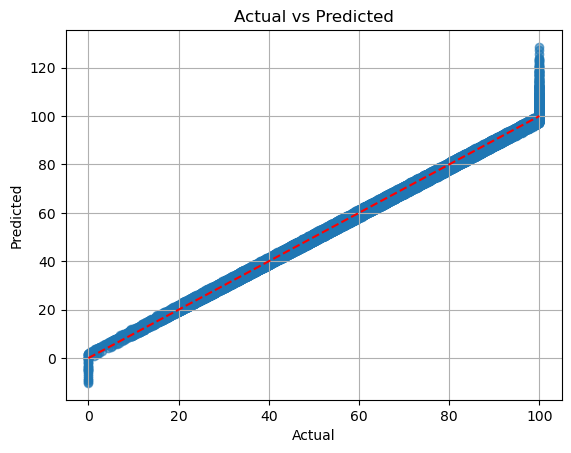

In [101]:
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

> The predicted vs. actual plot reveals that the linear model has **difficulty capturing patterns at the extremes** of the target variable. This suggests potential **underfitting in those regions**, likely due to the model's limited ability to capture nonlinear relationships in the data.

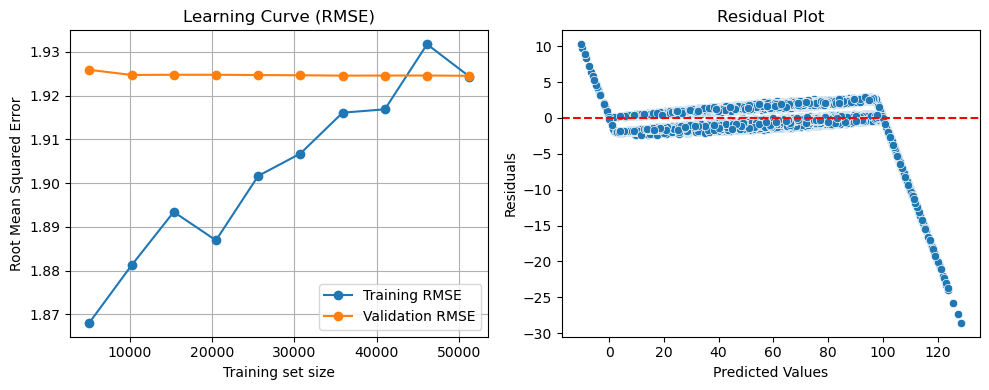

In [104]:
# When using learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train,
    scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    n_jobs=-1
)

# Invert the sign
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # width x height in inches

# Plot on the first axis
ax1.plot(train_sizes, train_errors, 'o-', label="Training RMSE")
ax1.plot(train_sizes, val_errors, 'o-', label="Validation RMSE")
ax1.set_xlabel("Training set size")
ax1.set_ylabel("Root Mean Squared Error")
ax1.set_title("Learning Curve (RMSE)")
ax1.legend()
ax1.grid(True)
# Plot on the second axis
residuals = y_test - y_pred_test
sns.scatterplot(x=y_pred_test, y=residuals)
ax2.axhline(0, color='red', linestyle='--')
ax2.set_title("Residual Plot")
ax2.set_xlabel("Predicted Values")
ax2.set_ylabel("Residuals")


plt.tight_layout()
plt.show()

**Learning Curve:**
> The **increasing training error** as more data is added indicates that the simple model is unable to adequately fit the training set, resulting in larger errors. This points to the **model’s insufficient complexity to capture the underlying patterns** in the data.
> The **stabilizing validation error** further suggests that the model's performance on unseen data does not improve with additional training examples, reinforcing the notion that it **cannot generalize beyond its limited capacity**.

**Residuials:**
> The residuals are centered around zero, the presence of a pattern indicates potential misspecification of the model, such as the **need for a more complex relationship, say non-linearity between the features and the target variable**.


### Extreme Gradient Boosting - XGBoost Model

In [111]:
pipeline_XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('XGB', XGBRegressor(n_estimators=100, learning_rate=0.1,random_state=42,verbosity=0   ))
])
pipeline_XGB.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ord1',
                                                  OrdinalEncoder(categories=[[1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9,
                                                                              10]]),
                                                  ['Stress_Level']),
                                                 ('ord2',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High']]),
                                                  ['Exercise_Frequency']),
                                                 ('number', MinMaxScaler(),
                                                  ['Age', 'Caffeine_Intake',
                                                   'Sleep_Duration',
                                                   'Daily_Screen_Time',
                                                   'Reaction_Time',
                                                   'Memory_Test_Score']...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [113]:
y_pred_test = pipeline_XGB.predict(X_test)
y_pred_train = pipeline_XGB.predict(X_train)

In [115]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score Test: {r2_test:.3f}")
print(f"R² Score Train: {r2_train:.3f}")

MSE: 1.672
RMSE: 1.293
R² Score Test: 0.997
R² Score Train: 0.998


#### Hyperparameter Tuning - XGBoost Model

In [118]:
param_grid = {
    'XGB__n_estimators': [100, 200],
    'XGB__max_depth': [3, 5, 7],
    'XGB__learning_rate': [0.01, 0.1, 0.3],
    'XGB__subsample': [0.8, 1.0]
}
grid_search = GridSearchCV(
    pipeline_XGB,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('ord1',
                                                                         OrdinalEncoder(categories=[[1,
                                                                                                     2,
                                                                                                     3,
                                                                                                     4,
                                                                                                     5,
                                                                                                     6,
                                                                                                     7,
                                                                                                     8,
                                                                                                     9,
                                                                                                     10]]),
                                                                         ['Stress_Level']),
                                                                        ('ord2',
                                                                         OrdinalEncoder(categories=[['Low',
                                                                                                     'Medium',
                                                                                                     'High']]),
                                                                         ['Exercise_Frequency']),
                                                                        ('number',
                                                                         MinMaxScaler(),
                                                                         ['Age',
                                                                          'Caffeine_Intake',
                                                                          'Sleep_Duration',
                                                                          'Daily_Screen_Time',
                                                                          'Reactio...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'XGB__learning_rate': [0.01, 0.1, 0.3],
                         'XGB__max_depth': [3, 5, 7],
                         'XGB__n_estimators': [100, 200],
                         'XGB__subsample': [0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=2)

#### XGBoost Model Evaluation

In [120]:
best_model = grid_search.best_estimator_
XGB_best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)
# mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score Test: {r2_test:.3f}")
print(f"R² Score Train: {r2_train:.3f}")

MSE: 1.291
RMSE: 1.136
R² Score Test: 0.998
R² Score Train: 0.999


In [121]:

results.append({'Model': 'XGBoost', 'MSE': round(mse, 4), 'RMSE': round(rmse, 4), 'R² Score Test' : round(r2_test,4) , 'R² Score Train':round(r2_train,4)})

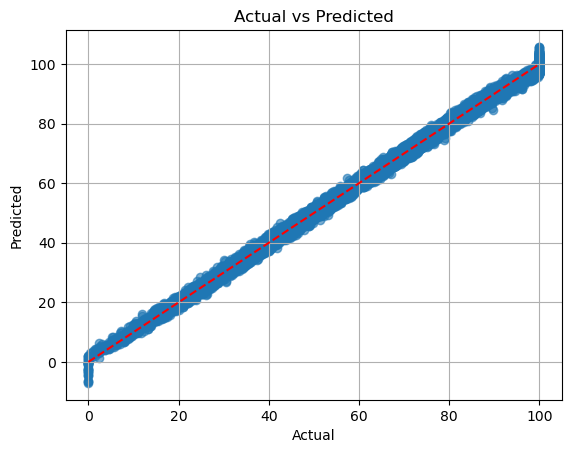

In [122]:
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

> Training with XGBoost significantly reduces the RMSE from 1.94 to 1.13, highlighting the model’s improved predictive performance.
> XGBoost effectively **captures complex, nonlinear relationships in the data**, leading to a substantial improvement over simpler models.
> The predicted vs. actual plot demonstrates a good improvement in capturing the values at the extremes than linear models.

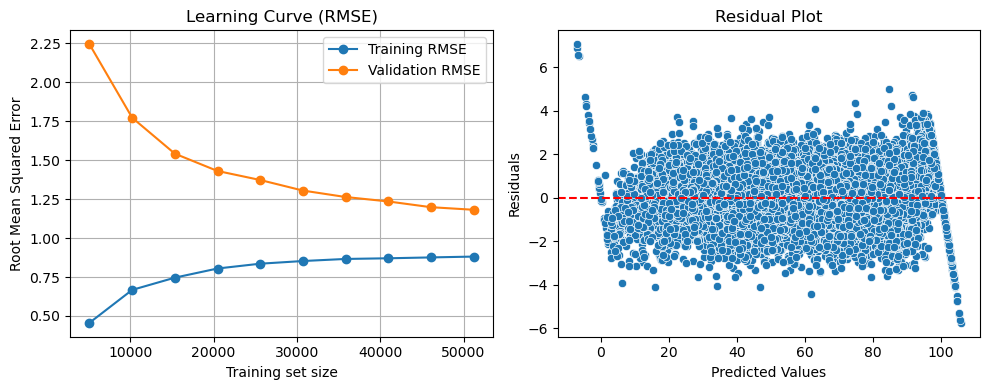

In [124]:
# When using learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train,
    scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    n_jobs=-1
)

# Invert the sign
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # width x height in inches

# Plot on the first axis
ax1.plot(train_sizes, train_errors, 'o-', label="Training RMSE")
ax1.plot(train_sizes, val_errors, 'o-', label="Validation RMSE")
ax1.set_xlabel("Training set size")
ax1.set_ylabel("Root Mean Squared Error")
ax1.set_title("Learning Curve (RMSE)")
ax1.legend()
ax1.grid(True)
# Plot on the second axis
residuals = y_test - y_pred_test
sns.scatterplot(x=y_pred_test, y=residuals)
ax2.axhline(0, color='red', linestyle='--')
ax2.set_title("Residual Plot")
ax2.set_xlabel("Predicted Values")
ax2.set_ylabel("Residuals")


plt.tight_layout()
plt.show()

**Learning Curve:**
>While the **validation error drops significantly**, this indicates **a well-regularized model with good generalization and no overfitting**. When the **training error (MSE) slightly increases** with training size indicates the model **benefits from more data and generalizes better with larger datasets**. This aligns with the "more data improves performance" paradigm for robust models.

**Residuals:**
>The residuals for the XGBoost model are randomly distributed, but for a few points at the extremes, and do not exhibit any obvious patterns.

### RandomForest Model

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [135]:
pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('RF', RandomForestRegressor(n_estimators=80, random_state=42))
])
pipeline_RF.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ord1',
                                                  OrdinalEncoder(categories=[[1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9,
                                                                              10]]),
                                                  ['Stress_Level']),
                                                 ('ord2',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High']]),
                                                  ['Exercise_Frequency']),
                                                 ('number', MinMaxScaler(),
                                                  ['Age', 'Caffeine_Intake',
                                                   'Sleep_Duration',
                                                   'Daily_Screen_Time',
                                                   'Reaction_Time',
                                                   'Memory_Test_Score']),
                                                 ('nominal',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Diet_Type'])])),
                ('RF',
                 RandomForestRegressor(n_estimators=80, random_state=42))])

In [136]:
y_pred_test = pipeline_RF.predict(X_test)
y_pred_train = pipeline_RF.predict(X_train)

In [137]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score Test: {r2_test:.3f}")
print(f"R² Score Train: {r2_train:.3f}")

MSE: 6.402
RMSE: 2.530
R² Score Test: 0.988
R² Score Train: 0.998


#### Hyperparameter Tuning - RandomForest Model

In [139]:

param = {
    'RF__n_estimators': [60, 80, 100, 200],
    'RF__max_depth': [5, 10, 20, None],
    'RF__min_samples_split': [2, 5, 10],
    'RF__min_samples_leaf': [1, 2, 4],
    'RF__max_features': ['sqrt', 'log2', None],
    'RF__bootstrap': [True]
}

In [140]:
random_search = RandomizedSearchCV(
    pipeline_RF,
    param_distributions=param,
    n_iter=30,                   
    cv=5,                       
    scoring='neg_root_mean_squared_error',
    verbose=0,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
# best_model = random_search.best_estimator_

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('ord1',
                                                                               OrdinalEncoder(categories=[[1,
                                                                                                           2,
                                                                                                           3,
                                                                                                           4,
                                                                                                           5,
                                                                                                           6,
                                                                                                           7,
                                                                                                           8,
                                                                                                           9,
                                                                                                           10]]),
                                                                               ['Stress_Level']),
                                                                              ('ord2',
                                                                               OrdinalEncoder(categories=[['Low',
                                                                                                           'Medium',
                                                                                                           'High']]),
                                                                               ['Exercise_Frequency']),
                                                                              ('number',
                                                                               MinMaxScaler(),
                                                                               ['Age',
                                                                                'Caffeine_Intake',
                                                                                'Sleep_Duration',
                                                                                'Daily_Screen_Time',
                                                                                'R...
                                             ('RF',
                                              RandomForestRegressor(n_estimators=80,
                                                                    random_state=42))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'RF__bootstrap': [True],
                                        'RF__max_depth': [5, 10, 20, None],
                                        'RF__max_features': ['sqrt', 'log2',
                                                             None],
                                        'RF__min_samples_leaf': [1, 2, 4],
                                        'RF__min_samples_split': [2, 5, 10],
                                        'RF__n_estimators': [60, 80, 100, 200]},
                   random_state=42, scoring='neg_root_mean_squared_error')

#### RandomForest Model Evaluation

In [142]:
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score Test: {r2_test:.3f}")
print(f"R² Score Train: {r2_train:.3f}")

MSE: 6.536
RMSE: 2.557
R² Score Test: 0.988
R² Score Train: 0.997


In [143]:
results.append({'Model': 'RandomForest', 'MSE': round(mse, 4), 'RMSE': round(rmse, 4), 'R² Score Test' : round(r2_test,4) , 'R² Score Train':round(r2_train,4)})

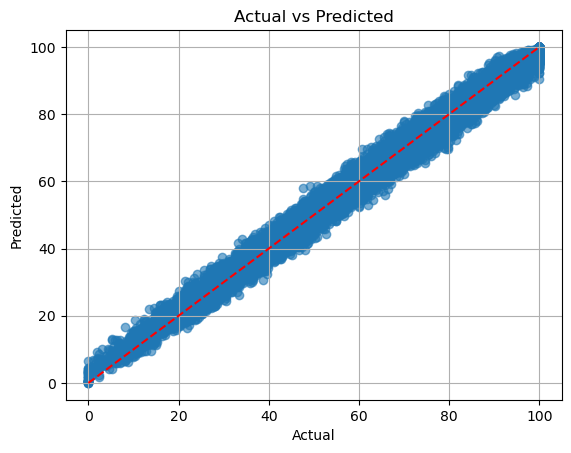

In [144]:
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

The plot of actual versus predicted values demonstrates that the **model is robust, with minimal deviation** across the prediction range. Unlike previous models, it shows **no signs of leakage or instability at the extremes**, indicating that the model has effectively learned underlying patterns even in boundary regions. Inspite of this, we see there is a **rise in the RMSE**. This model exibits an RMSE of 2.55.

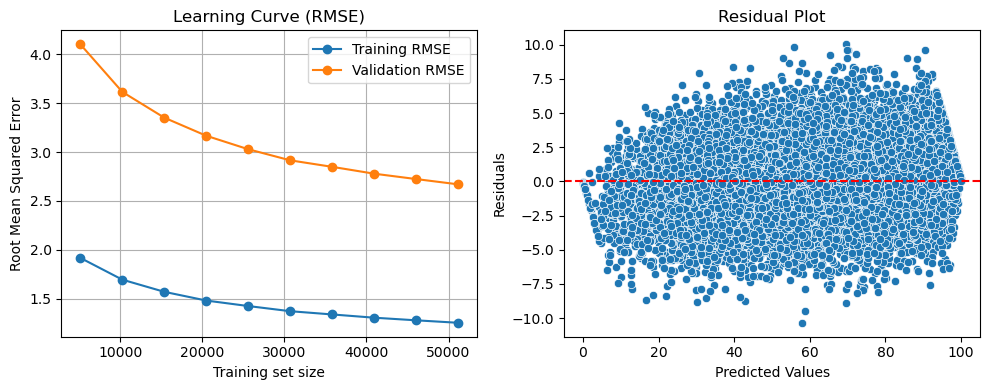

In [146]:
# When using learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train,
    scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    n_jobs=-1
)

# Invert the sign
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # width x height in inches

# Plot on the first axis
ax1.plot(train_sizes, train_errors, 'o-', label="Training RMSE")
ax1.plot(train_sizes, val_errors, 'o-', label="Validation RMSE")
ax1.set_xlabel("Training set size")
ax1.set_ylabel("Root Mean Squared Error")
ax1.set_title("Learning Curve (RMSE)")
ax1.legend()
ax1.grid(True)
# Plot on the second axis
residuals = y_test - y_pred_test
sns.scatterplot(x=y_pred_test, y=residuals)
ax2.axhline(0, color='red', linestyle='--')
ax2.set_title("Residual Plot")
ax2.set_xlabel("Predicted Values")
ax2.set_ylabel("Residuals")


plt.tight_layout()
plt.show()

**Learning Curve:**
> **Validation Error drops significantly** shows the model improves steadily with more training data, indicating it **benefits from larger datasets and generalizes better**. **Training Error decreases indicating  model learns the training data better** with more samples, but the gradual decline rather than a sharp drop suggests appropriate complexity-it isn’t overfitting.

**Residuals:**
>The residual plot shows that the errors are **randomly scattered around zero, indicating that the model's predictions are unbiased**. This pattern suggests that the model has captured the underlying relationships in the data well. 

In [148]:
results

[{'Model': 'Linear Regression',
  'MSE': 3.7644,
  'RMSE': 1.9402,
  'R² Score Test': 0.9929,
  'R² Score Train': 0.9931},
 {'Model': 'Lasso Regression',
  'MSE': 3.7642,
  'RMSE': 1.9402,
  'R² Score Test': 0.9929,
  'R² Score Train': 0.993},
 {'Model': 'XGBoost',
  'MSE': 1.2907,
  'RMSE': 1.1361,
  'R² Score Test': 0.9976,
  'R² Score Train': 0.9985},
 {'Model': 'RandomForest',
  'MSE': 6.5359,
  'RMSE': 2.5565,
  'R² Score Test': 0.9876,
  'R² Score Train': 0.9973}]

### Model Comparison 

In [160]:
results_df = pd.DataFrame(results)
results_df

Model     MSE    RMSE  R² Score Test  R² Score Train
0  Linear Regression  3.7644  1.9402         0.9929          0.9931
1   Lasso Regression  3.7642  1.9402         0.9929          0.9930
2            XGBoost  1.2907  1.1361         0.9976          0.9985
3       RandomForest  6.5359  2.5565         0.9876          0.9973

**Evaluation Metric:**
> **RMSE(Root Mean Square Error)** is chosen to evaluate regression models because it **provides a clear, interpretable measure of predictive accuracy, penalizing larger errors more significantly**, which makes it sensitive to model performance across the entire range of the target variable.

**Best Model:**
> **XGBoost is the best model** here with the lowest RMSE of 1.130, indicating that it has the highest predictive accuracy and is likely capturing more complex, nonlinear relationships in the data compared to the other models.
>
> Linear Regression and Lasso Regression both have the same RMSE of 1.940, suggesting they perform similarly, also due to their simple nature, they couldn't capture all non-linear relationships and complex patterns of the data.
>
> Random Forest has the highest RMSE of 2.555, indicating it does not perform as well as the other models in predicting the target variable. 

#### Feature Contributions of the Best Model - XGBoost

100%|===================| 15934/16000 [02:21<00:00]        

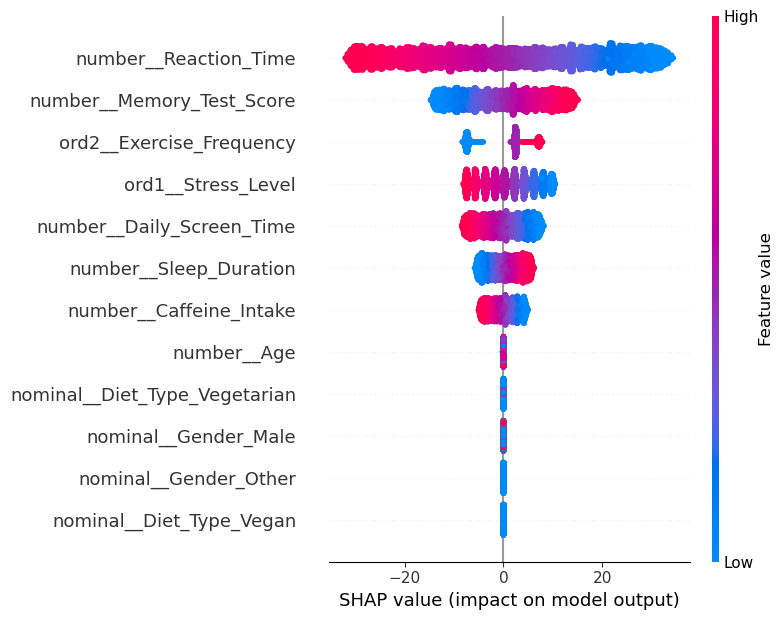

In [165]:
X_test_transformed = pipeline_XGB.named_steps["preprocessor"].transform(X_test)
feature_names = pipeline_XGB.named_steps["preprocessor"].get_feature_names_out()
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)
XGB_model = XGB_best_model.named_steps["XGB"]

explainer = shap.Explainer(XGB_model, X_test_df)
shap_values = explainer(X_test_df)
shap.summary_plot(shap_values, X_test_df)

The SHAP analysis reveals that **Reaction Time and Memory Test Score** are the **primary drivers of the Cognitive Score prediction**, highlighting their substantial influence on the model's output. These are closely followed by **Exercise Frequency, Stress Level, Daily Screen Time, and Caffeine Intake, which also play a notable role in shaping the predictions**. On the other hand, features like Age, Gender, and Diet Type exhibit minimal influence, as their contribution to the cognitive score prediction is relatively insignificant.

### Conclusion

The machine learning model for predicting Cognitive Score has identified Reaction Time and Memory Test Score as the most influential predictors. **To improve cognitive performance, individuals should focus on enhancing these mental abilities through mental exercises and cognitive training. Additionally, adopting healthier lifestyle habits, such as regular physical activity, stress management, reducing screen time, ensuring adequate sleep, and moderating caffeine intake, can further boost cognitive function.**